In [1]:
# Import the main leabrarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [ ]:
# Import data
df=pd.read_csv("Coffe_sales.csv")
df.head(10)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000


In [3]:
df.tail()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000
3546,18,card,35.76,Latte,Night,Sun,Mar,7,3,2025-03-23,18:11:38.635000


In [4]:
# Check the missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [6]:
df.columns 

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [7]:
print(df["cash_type"].unique())
print("-"*40)
print(df["coffee_name"].unique())
print("-"*40)
print(df["money"].unique())

['card']
----------------------------------------
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
----------------------------------------
[38.7  28.9  33.8  24.   32.82 37.72 27.92 23.02 18.12 35.76 30.86 25.96
 21.06]


In [8]:
# Analys data
Result=(
    df.groupby(["money","coffee_name"])["coffee_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="coffee_name")
    .reset_index(drop=True)
) 
Result #every coffee name have 4 values 


,money,coffee_name,count
0,23.02,Americano,98
1,28.90,Americano,53
2,27.92,Americano,72
3,25.96,Americano,341
4,27.92,Americano with Milk,222
5,32.82,Americano with Milk,147
6,30.86,Americano with Milk,389
7,33.80,Americano with Milk,51
8,35.76,Cappuccino,235
9,38.70,Cappuccino,39


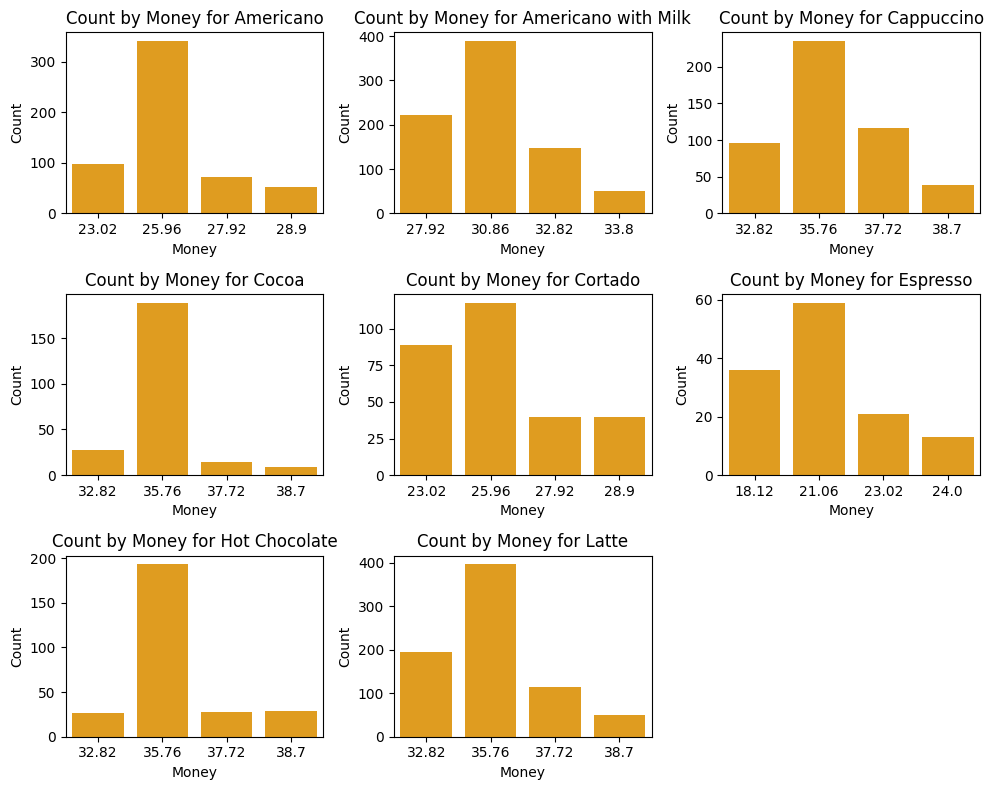

In [9]:
fig,axes=plt.subplots(3,3,figsize=(10,8))
features=sorted(Result["coffee_name"].unique())
axes=axes.flatten()
for i,names in enumerate(features):
    sns.barplot(data=Result[Result["coffee_name"]==names], x="money", y="count",color="orange",ax=axes[i])
    axes[i].set_xlabel("Money")
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Count by Money for {names}")
fig.delaxes(axes[i+1])
plt.tight_layout()
plt.show()


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
sumary_data=(
    df.groupby(["money","coffee_name","Monthsort","year","Month_name"])["coffee_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by=["coffee_name","year","Monthsort"])
    .reset_index(drop=True)
) 
sumary_data

,money,coffee_name,Monthsort,year,Month_name,count
0,28.90,Americano,3,2024,Mar,32
1,27.92,Americano,4,2024,Apr,12
2,28.90,Americano,4,2024,Apr,21
3,27.92,Americano,5,2024,May,40
4,27.92,Americano,6,2024,Jun,14
...,...,...,...,...,...,...
119,35.76,Latte,11,2024,Nov,68
120,35.76,Latte,12,2024,Dec,47
121,35.76,Latte,1,2025,Jan,41
122,35.76,Latte,2,2025,Feb,54


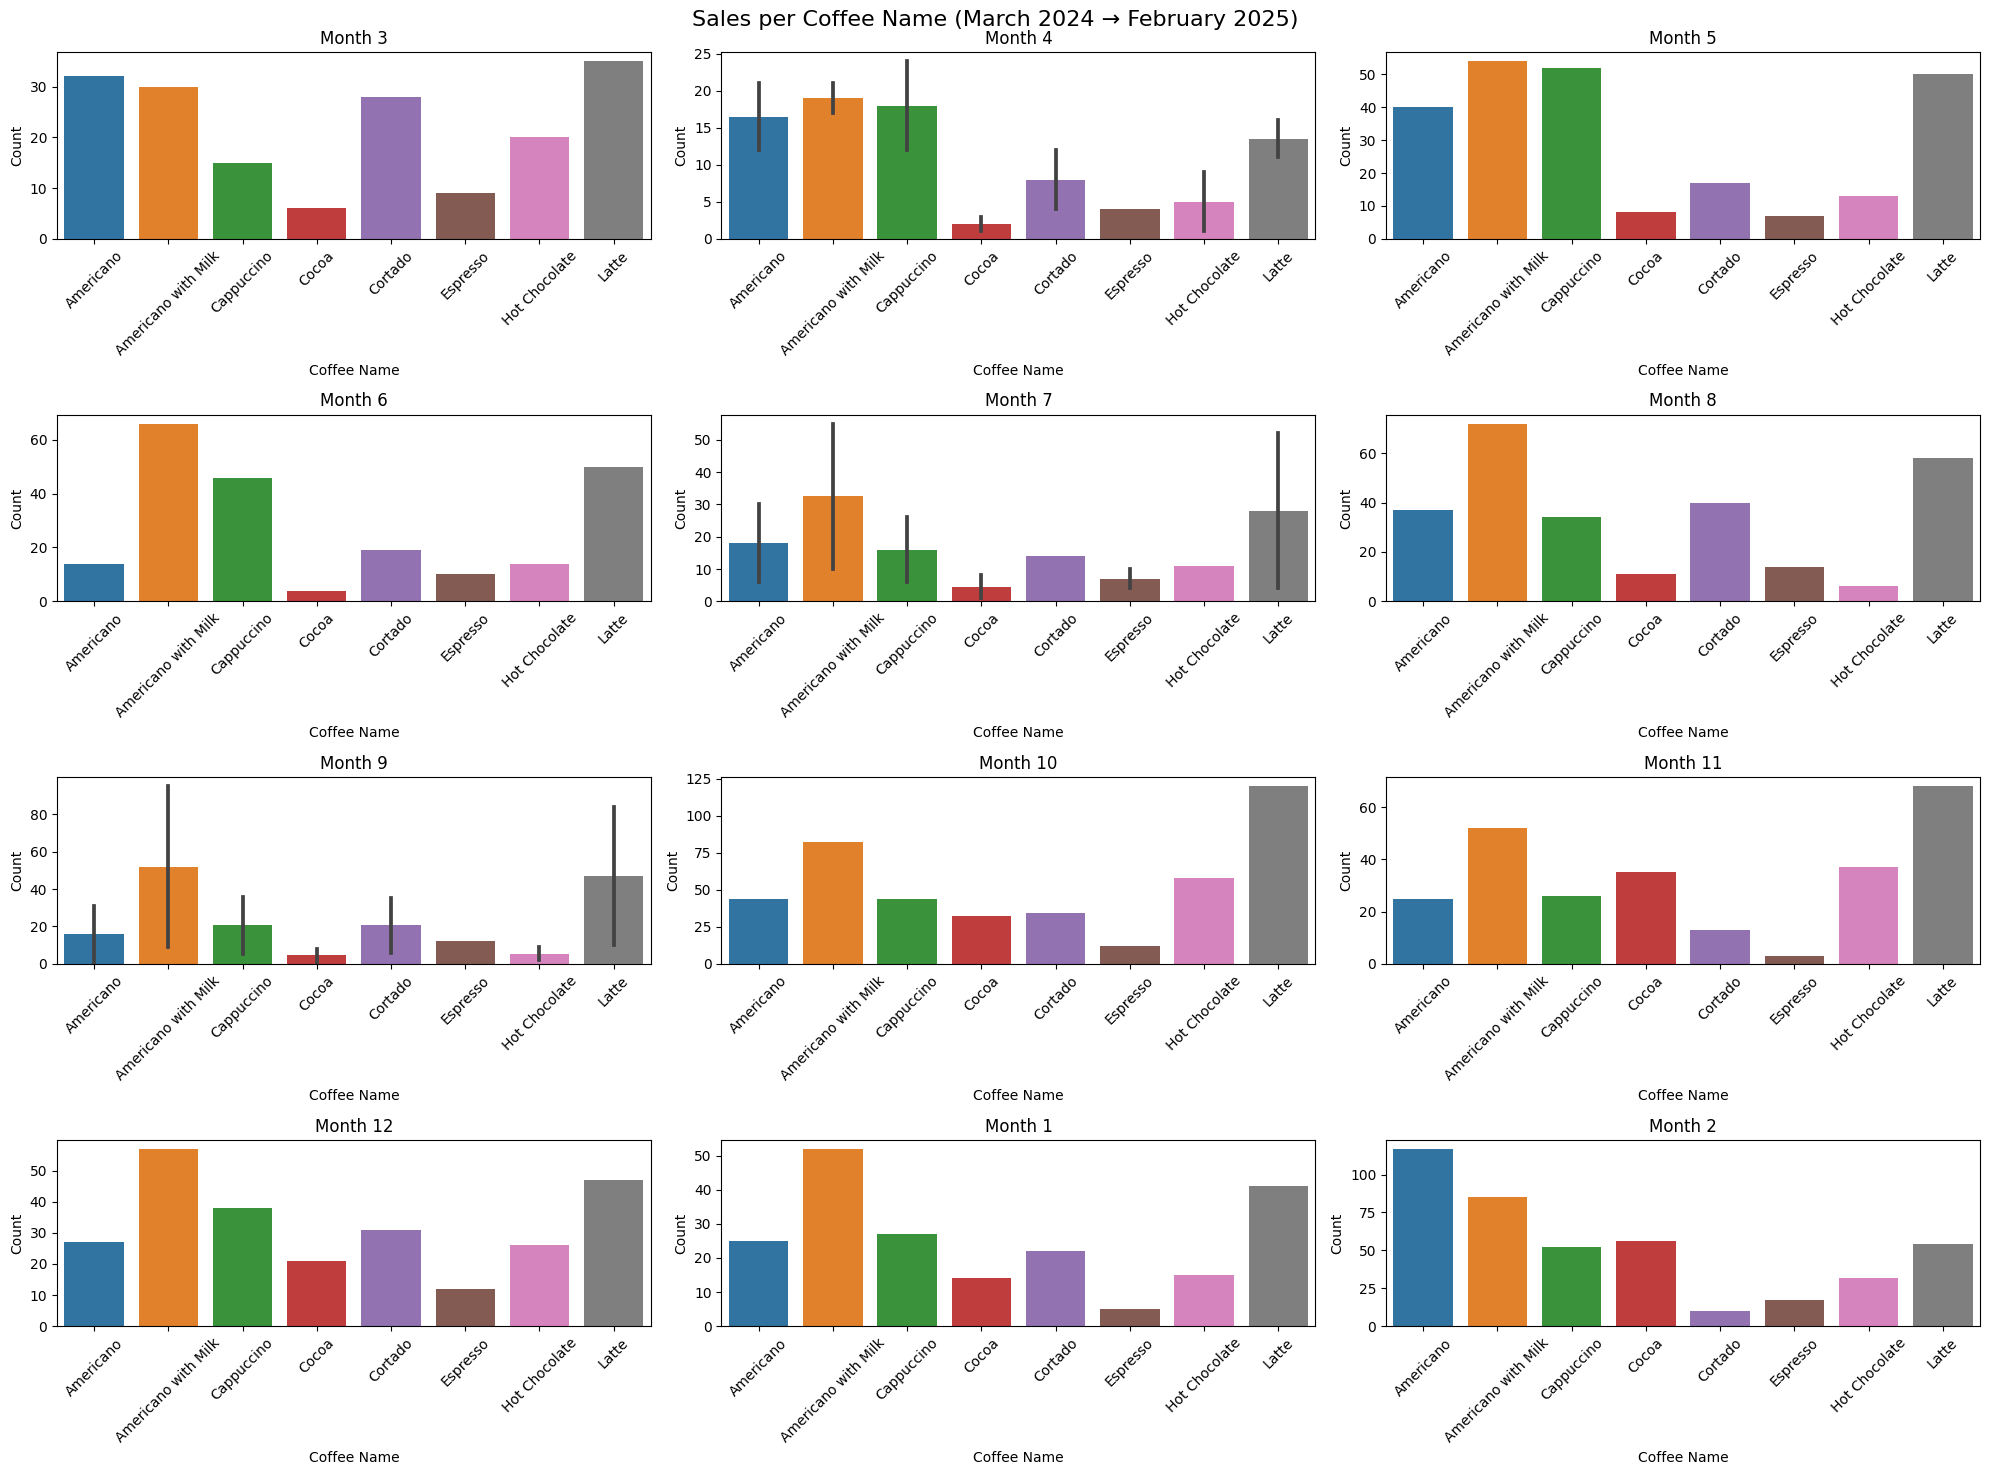

In [11]:
#My analys is about 1 year in project coffee shop so i felter my data from 3/2024 to 2/2025 
#After that i will  ompare  month 3 from 2024 with month 3 in 2025
mask = (sumary_data['year'] == 2024) | ((sumary_data['year'] == 2025) & (sumary_data["Monthsort"] < 3))
filtered = sumary_data[mask]
features = [3,4,5,6,7,8,9,10,11,12,1,2]
fig, axes = plt.subplots(4, 3, figsize=(20,15))
axes = axes.flatten()

for i, Month in enumerate(features):
    data_month = filtered[filtered["Monthsort"] == Month]
    sns.barplot(
        data=data_month,
        x="coffee_name",
        y="count",
        ax=axes[i]
    )
    axes[i].set_title(f"Month {Month}")
    axes[i].set_xlabel("Coffee Name")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

fig.suptitle("Sales per Coffee Name (March 2024 → February 2025)", fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
data_sumary=(
    df.groupby(["coffee_name","Monthsort","year","Month_name"])["money"]
    .sum()
    .reset_index(name="Totale sales")
    .sort_values(by=["coffee_name","year","Monthsort"])
    .reset_index(drop=True)
) 
data_sumary

,coffee_name,Monthsort,year,Month_name,Totale sales
0,Americano,3,2024,Mar,924.80
1,Americano,4,2024,Apr,941.94
2,Americano,5,2024,May,1116.80
3,Americano,6,2024,Jun,390.88
4,Americano,7,2024,Jul,858.12
...,...,...,...,...,...
99,Latte,11,2024,Nov,2431.68
100,Latte,12,2024,Dec,1680.72
101,Latte,1,2025,Jan,1466.16
102,Latte,2,2025,Feb,1931.04


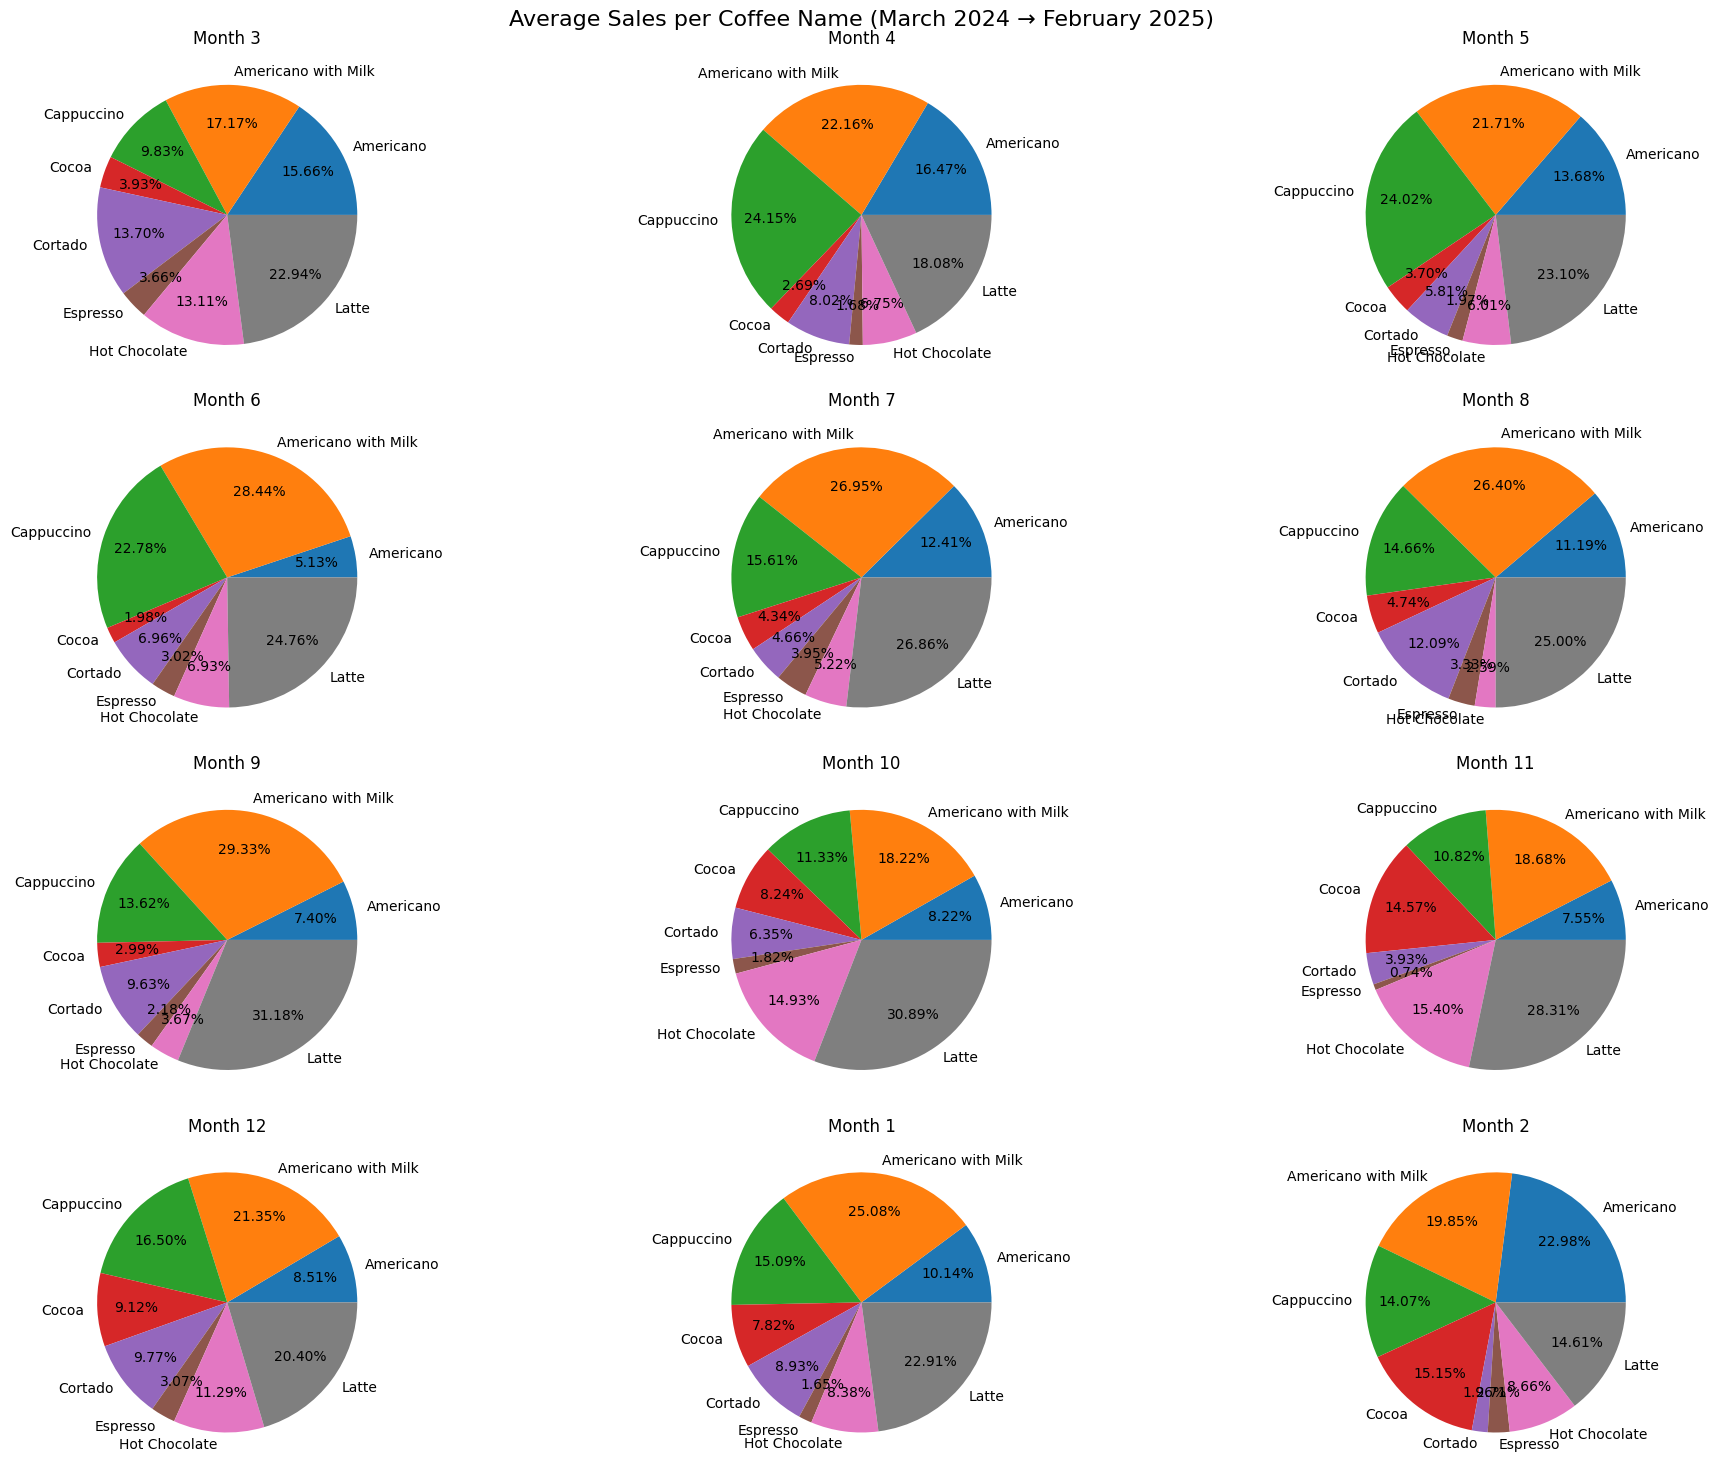

In [13]:
mask = (data_sumary['year'] == 2024) | ((data_sumary['year'] == 2025) & (data_sumary["Monthsort"] < 3))
filtered = data_sumary[mask]
features = [3,4,5,6,7,8,9,10,11,12,1,2]            
fig, axes = plt.subplots(4, 3, figsize=(20,15))
axes = axes.flatten()

for i, Month in enumerate(features):
    ax = axes[i]
    ax.pie(
        filtered[filtered["Monthsort"] == Month]["Totale sales"]
        ,labels=filtered[filtered["Monthsort"] == Month]["coffee_name"]
        ,autopct="%.2f%%"
        ,pctdistance=0.7
    )
    ax.set_title(f"Month {Month}")
fig.suptitle("Average Sales per Coffee Name (March 2024 → February 2025)", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/1439960223.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_numeric = pivot.replace(color_map)


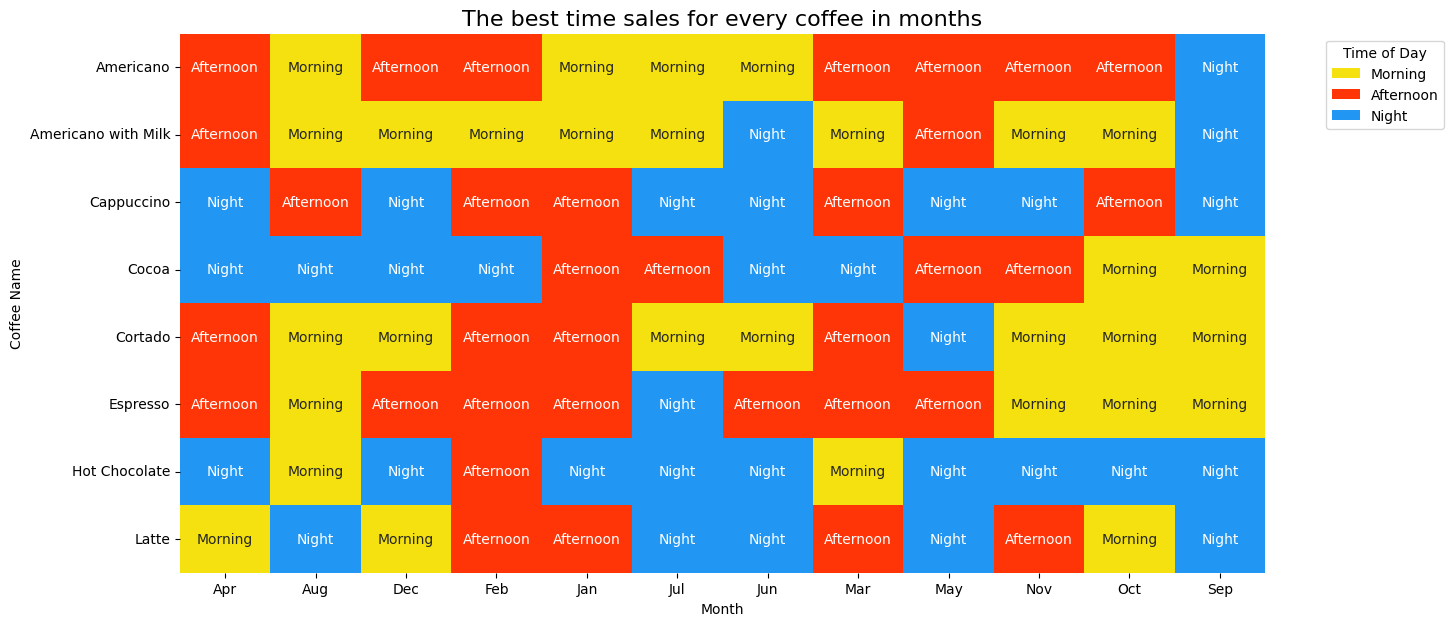

In [14]:
summary = (
    df.groupby(["Monthsort", "Month_name", "coffee_name", "Time_of_Day"])["money"]
    .sum()
    .reset_index()
)
best_per_coffee_month = summary.loc[
    summary.groupby(["Monthsort", "coffee_name"])["money"].idxmax()
]
pivot = best_per_coffee_month.pivot(
    index="coffee_name",
    columns="Month_name",
    values="Time_of_Day"
)
color_map = {"Morning": 0, "Afternoon": 1, "Night": 2}
pivot_numeric = pivot.replace(color_map)
custom_colors = sns.color_palette(["#F4E10F", "#FF3407", "#2196F3"])
plt.figure(figsize=(14,7))
ax = sns.heatmap(
    pivot_numeric,
    cmap=custom_colors,
    cbar=False,
    annot=pivot.values, 
    fmt=""
)
plt.title("The best time sales for every coffee in months", fontsize=16) 
plt.xlabel("Month")
plt.ylabel("Coffee Name")
legend_elements = [
    Patch(facecolor="#F4E10F", label="Morning"),
    Patch(facecolor="#FF3407", label="Afternoon"),
    Patch(facecolor="#2196F3", label="Night")
]
plt.legend(handles=legend_elements, title="Time of Day", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
